<a href="https://colab.research.google.com/github/group-5-python/Source-code/blob/master/mazenogilzene.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Data manipulation and analysis
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine learning
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score
from scipy.stats import uniform
!pip install streamlit
import streamlit as st


from google.colab import drive

drive.mount('/content/gdrive')

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 27.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 16.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 73.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.9/82.9 kB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 4.7 MB/s eta 0:00:00
  Attempting uninstall: tenacity
    Found existing installation: tenacity 9.0.0
    Uninstalling tenacity-9.0.0:
      Successfully uninstalled tenacity-9.0.0
Mounted at /content/gdrive


In [3]:
#loading the dataset

vehicles_df = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/ITT316/FinalProject/vehicles.csv')

In [4]:
# Identifying missing values
missing_values = vehicles_df.isnull().mean().sort_values(ascending=False) * 100
print(missing_values)

county          100.000000
size             71.767476
cylinders        41.622470
condition        40.785232
VIN              37.725356
drive            30.586347
paint_color      30.501078
type             21.752717
manufacturer      4.133714
title_status      1.930753
lat               1.534155
long              1.534155
model             1.236179
odometer          1.030735
fuel              0.705819
transmission      0.598763
year              0.282281
image_url         0.015930
posting_date      0.015930
url               0.000000
price             0.000000
state             0.000000
region_url        0.000000
region            0.000000
id                0.000000
dtype: float64


In [5]:
# Drop columns with more than 50% missing values
threshold = 50
columns_to_drop = missing_values[missing_values > threshold].index
vehicles_df = vehicles_df.drop(columns=columns_to_drop)

# Display the remaining columns after dropping
print("Remaining columns after dropping those with > 50% missing values:")
print(vehicles_df.columns)


Remaining columns after dropping those with > 50% missing values:
Index(['id', 'url', 'region', 'region_url', 'price', 'year', 'manufacturer',
       'model', 'condition', 'cylinders', 'fuel', 'odometer', 'title_status',
       'transmission', 'VIN', 'drive', 'type', 'paint_color', 'image_url',
       'state', 'lat', 'long', 'posting_date'],
      dtype='object')


In [6]:
# Checking the data types of the remaining columns
print("Data types of remaining columns:")
print(vehicles_df.dtypes)


Data types of remaining columns:
id                int64
url              object
region           object
region_url       object
price             int64
year            float64
manufacturer     object
model            object
condition        object
cylinders        object
fuel             object
odometer        float64
title_status     object
transmission     object
VIN              object
drive            object
type             object
paint_color      object
image_url        object
state            object
lat             float64
long            float64
posting_date     object
dtype: object


In [7]:
# Determine categorical and numerical columns
categorical_columns = vehicles_df.select_dtypes(include=['object']).columns
numerical_columns = vehicles_df.select_dtypes(include=[np.number]).columns

In [8]:
# Fill missing values for categorical columns with the mode
for col in categorical_columns:
    mode_value = vehicles_df[col].mode()[0]
    vehicles_df[col] = vehicles_df[col].fillna(mode_value)

# Fill missing values for numerical columns with the median
for col in numerical_columns:
    median_value = vehicles_df[col].median()
    vehicles_df[col] = vehicles_df[col].fillna(median_value)

# Verify if there are any remaining missing values
print("Remaining missing values after imputation:")
print(vehicles_df.isnull().sum())


Remaining missing values after imputation:
id              0
url             0
region          0
region_url      0
price           0
year            0
manufacturer    0
model           0
condition       0
cylinders       0
fuel            0
odometer        0
title_status    0
transmission    0
VIN             0
drive           0
type            0
paint_color     0
image_url       0
state           0
lat             0
long            0
posting_date    0
dtype: int64


In [9]:
from sklearn.preprocessing import LabelEncoder

# Apply Label Encoding to all categorical columns
label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    vehicles_df[col] = le.fit_transform(vehicles_df[col])
    label_encoders[col] = le  # Save the encoder for inverse transformation if needed

# Display the first few rows of the encoded data
print("Data after Label Encoding:")
print(vehicles_df.head())


Data after Label Encoding:
           id     url  region  region_url  price    year  manufacturer  model  \
0  7222695916  301622     277         287   6000  2013.0            13  14220   
1  7218891961  121615     105         112  11900  2013.0            13  14220   
2  7221797935  183300     111         173  21000  2013.0            13  14220   
3  7222270760  420567     396         404   1500  2013.0            13  14220   
4  7210384030  147454     131         136   4900  2013.0            13  14220   

   condition  cylinders  ...  transmission    VIN  drive  type  paint_color  \
0          2          5  ...             0  15449      0     9           10   
1          2          5  ...             0  15449      0     9           10   
2          2          5  ...             0  15449      0     9           10   
3          2          5  ...             0  15449      0     9           10   
4          2          5  ...             0  15449      0     9           10   

   image_ur

In [10]:
# Check data types to ensure all are numeric
print("Data types after encoding:")
print(vehicles_df.dtypes)

# Display the first few rows to verify the encoded values
print("First few rows of the encoded dataset:")
print(vehicles_df.head())

# Final check for missing values
print("Any remaining missing values:")
print(vehicles_df.isnull().sum())


Data types after encoding:
id                int64
url               int64
region            int64
region_url        int64
price             int64
year            float64
manufacturer      int64
model             int64
condition         int64
cylinders         int64
fuel              int64
odometer        float64
title_status      int64
transmission      int64
VIN               int64
drive             int64
type              int64
paint_color       int64
image_url         int64
state             int64
lat             float64
long            float64
posting_date      int64
dtype: object
First few rows of the encoded dataset:
           id     url  region  region_url  price    year  manufacturer  model  \
0  7222695916  301622     277         287   6000  2013.0            13  14220   
1  7218891961  121615     105         112  11900  2013.0            13  14220   
2  7221797935  183300     111         173  21000  2013.0            13  14220   
3  7222270760  420567     396         404   

In [11]:
# Summary statistics for numerical columns
print("Summary statistics for numerical columns:")
print(vehicles_df.describe())


Summary statistics for numerical columns:
                 id            url         region     region_url  \
count  4.268800e+05  426880.000000  426880.000000  426880.000000   
mean   7.311487e+09  213439.500000     193.978062     202.259225   
std    4.473170e+06  123229.785793     117.573061     119.286841   
min    7.207408e+09       0.000000       0.000000       0.000000   
25%    7.308143e+09  106719.750000      82.000000      90.000000   
50%    7.312621e+09  213439.500000     197.000000     206.000000   
75%    7.315254e+09  320159.250000     290.000000     303.000000   
max    7.317101e+09  426879.000000     403.000000     412.000000   

              price           year   manufacturer          model  \
count  4.268800e+05  426880.000000  426880.000000  426880.000000   
mean   7.519903e+04    2011.240173      18.564472   16707.647290   
std    1.218228e+07       9.439234      11.496230    7803.108901   
min    0.000000e+00    1900.000000       0.000000       0.000000   
25%  

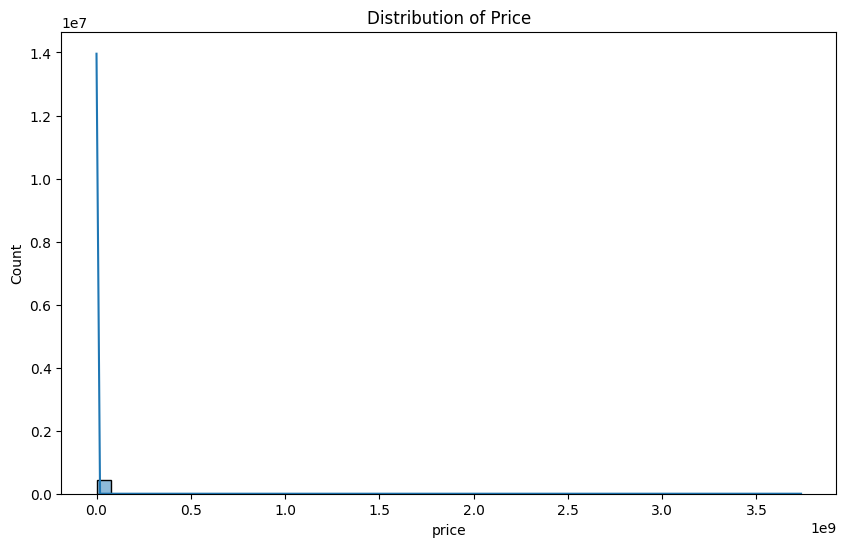

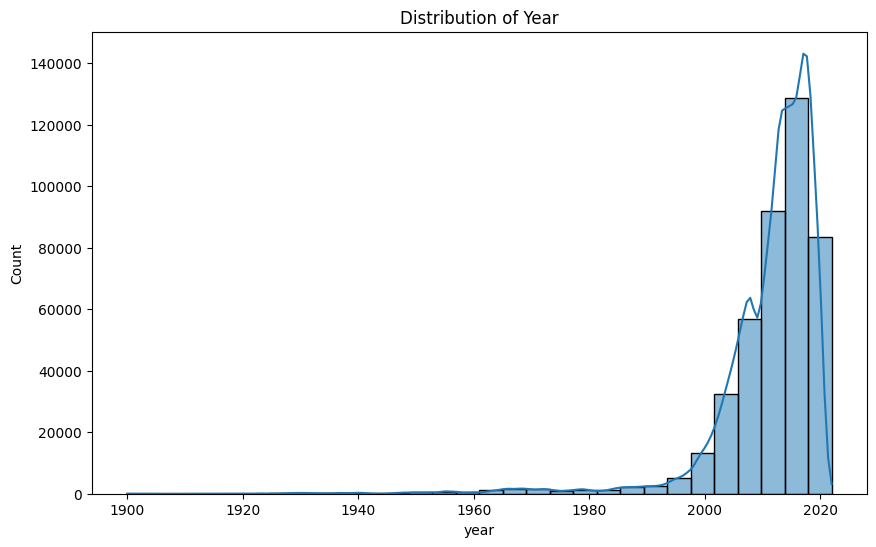

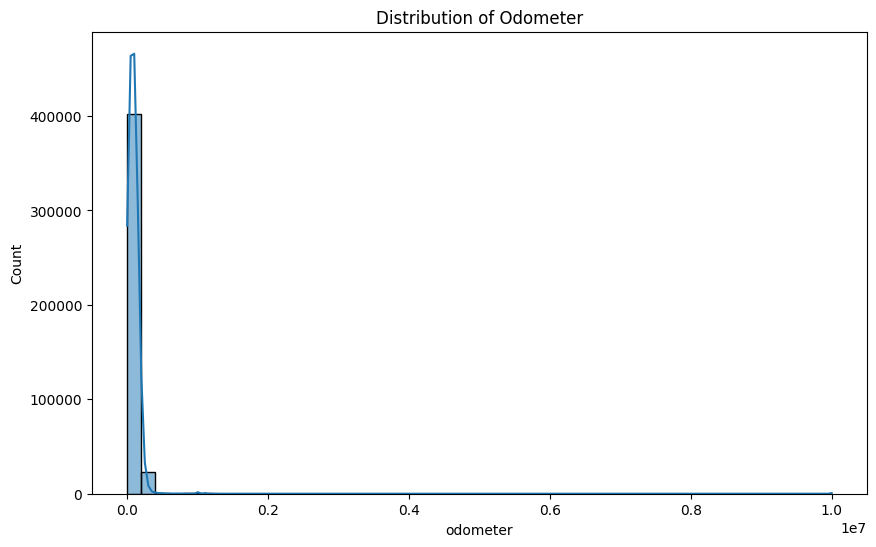

In [12]:

# Distribution of price
plt.figure(figsize=(10, 6))
sns.histplot(vehicles_df['price'], bins=50, kde=True)
plt.title('Distribution of Price')
plt.show()

# Distribution of year
plt.figure(figsize=(10, 6))
sns.histplot(vehicles_df['year'], bins=30, kde=True)
plt.title('Distribution of Year')
plt.show()

# Distribution of odometer
plt.figure(figsize=(10, 6))
sns.histplot(vehicles_df['odometer'], bins=50, kde=True)
plt.title('Distribution of Odometer')
plt.show()


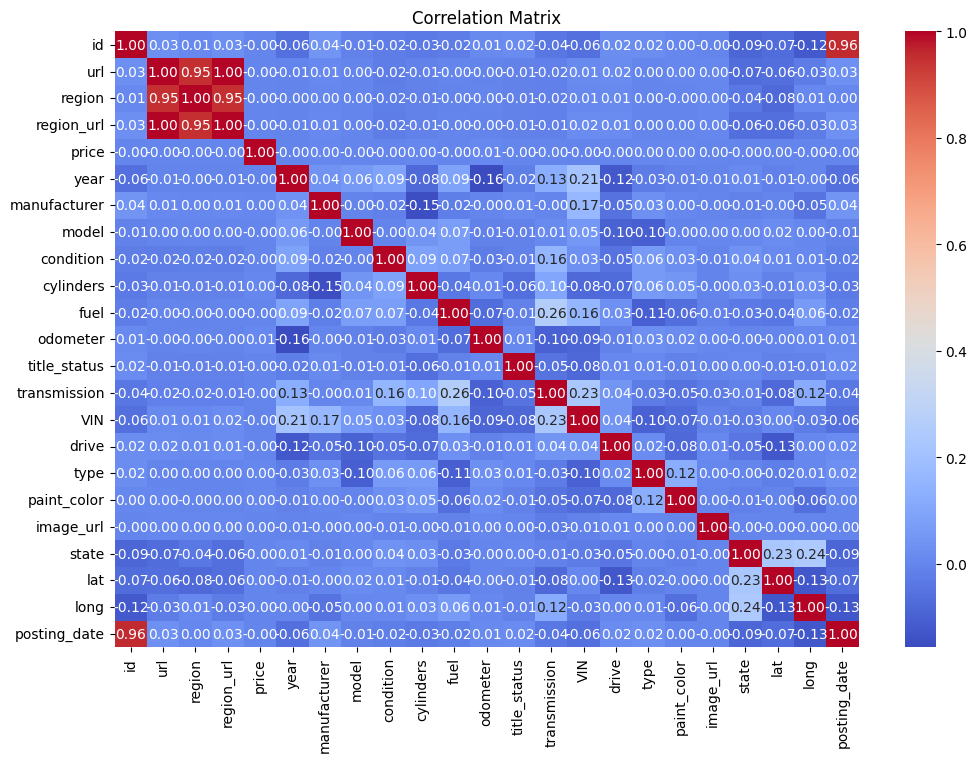

In [13]:
# Correlation matrix
corr_matrix = vehicles_df.corr()

# Heatmap of correlations
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


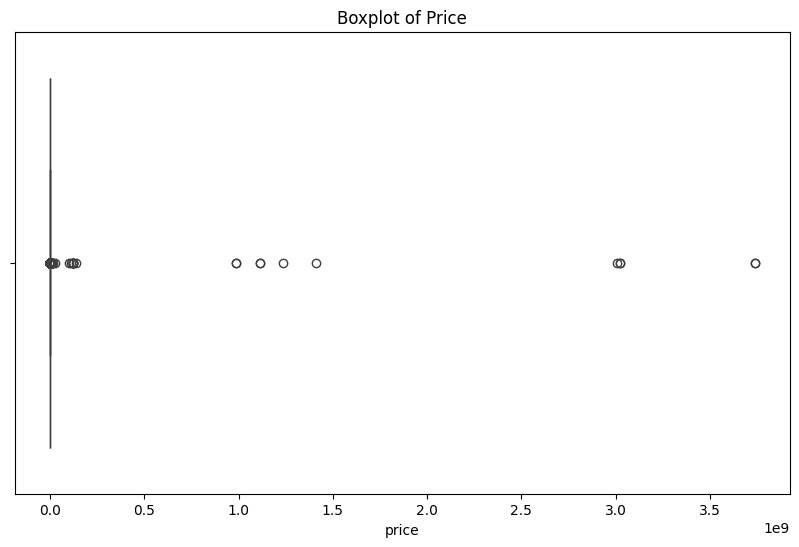

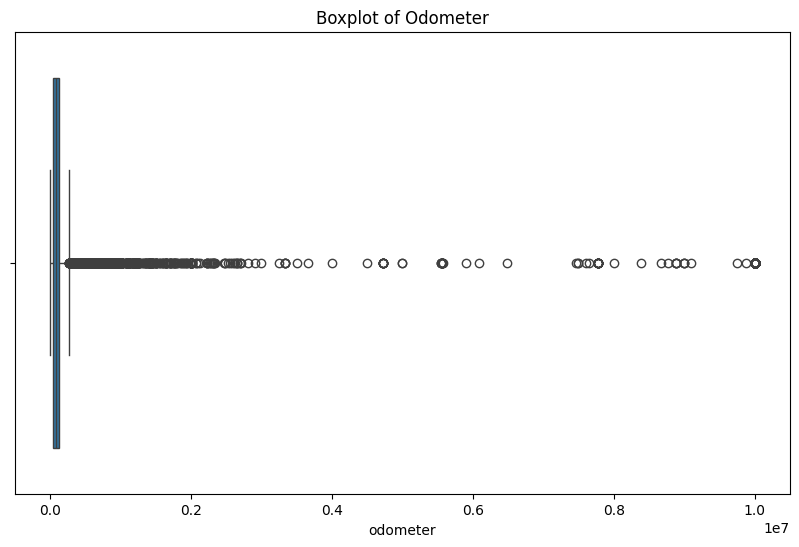

In [14]:
# Boxplot for price
plt.figure(figsize=(10, 6))
sns.boxplot(x=vehicles_df['price'])
plt.title('Boxplot of Price')
plt.show()

# Boxplot for odometer
plt.figure(figsize=(10, 6))
sns.boxplot(x=vehicles_df['odometer'])
plt.title('Boxplot of Odometer')
plt.show()


Distribution of Price after outlier removal:


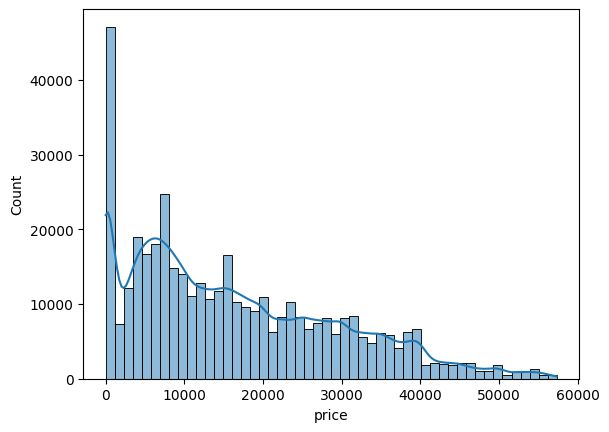

Distribution of Odometer after outlier removal:


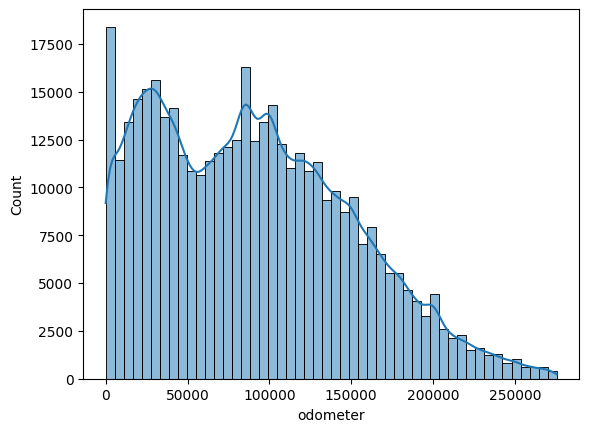

In [15]:
# removing outliers using IQR
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df

# Remove outliers for 'price' and 'odometer'
vehicles_df = remove_outliers(vehicles_df, 'price')
vehicles_df = remove_outliers(vehicles_df, 'odometer')

# Re-check distributions after outlier removal
print("Distribution of Price after outlier removal:")
sns.histplot(vehicles_df['price'], bins=50, kde=True)
plt.show()

print("Distribution of Odometer after outlier removal:")
sns.histplot(vehicles_df['odometer'], bins=50, kde=True)
plt.show()


In [16]:
#FEATURE ENGINEERING
# Removing non-informative columns
non_informative_columns = ['id', 'url', 'region_url', 'image_url', 'VIN']
vehicles_df = vehicles_df.drop(columns=non_informative_columns)

# Verify remaining columns
print("Remaining columns after dropping non-informative ones:")
print(vehicles_df.columns)


Remaining columns after dropping non-informative ones:
Index(['region', 'price', 'year', 'manufacturer', 'model', 'condition',
       'cylinders', 'fuel', 'odometer', 'title_status', 'transmission',
       'drive', 'type', 'paint_color', 'state', 'lat', 'long', 'posting_date'],
      dtype='object')


In [17]:
#Given the skewness of the price and odometer, we will transform the variable

#FEATURE TRANSFORMATION
# Apply log transformation to 'price' and 'odometer'
vehicles_df['log_price'] = np.log1p(vehicles_df['price'])  # log1p to handle zero values
vehicles_df['log_odometer'] = np.log1p(vehicles_df['odometer'])

# Verify the transformation
print("First few rows after log transformation:")
print(vehicles_df[['log_price', 'log_odometer']].head())


First few rows after log transformation:
   log_price  log_odometer
0   8.699681     11.356845
1   9.384378     11.356845
2   9.952325     11.356845
3   7.313887     11.356845
4   8.497195     11.356845


In [18]:
#FEATURE EXTRACTION
# Create a new feature: Age of the car
vehicles_df['car_age'] = 2024 - vehicles_df['year']

# Verify the new feature
print("First few rows with the new 'car_age' feature:")
print(vehicles_df[['year', 'car_age']].head())


First few rows with the new 'car_age' feature:
     year  car_age
0  2013.0     11.0
1  2013.0     11.0
2  2013.0     11.0
3  2013.0     11.0
4  2013.0     11.0


In [19]:
#fEATURE SELECTION
# Selecting features for the model
selected_features = ['log_price', 'log_odometer', 'car_age', 'manufacturer', 'model', 'condition', 'cylinders',
                     'fuel', 'title_status', 'transmission', 'drive', 'type', 'paint_color', 'state']

# Subset the dataset to only include these features
vehicles_df = vehicles_df[selected_features]

# Verify the final set of features
print("Final set of features for model training:")
print(vehicles_df.head())


Final set of features for model training:
   log_price  log_odometer  car_age  manufacturer  model  condition  \
0   8.699681     11.356845     11.0            13  14220          2   
1   9.384378     11.356845     11.0            13  14220          2   
2   9.952325     11.356845     11.0            13  14220          2   
3   7.313887     11.356845     11.0            13  14220          2   
4   8.497195     11.356845     11.0            13  14220          2   

   cylinders  fuel  title_status  transmission  drive  type  paint_color  \
0          5     2             0             0      0     9           10   
1          5     2             0             0      0     9           10   
2          5     2             0             0      0     9           10   
3          5     2             0             0      0     9           10   
4          5     2             0             0      0     9           10   

   state  
0      3  
1      2  
2      9  
3     19  
4     27  


In [20]:
from sklearn.model_selection import train_test_split

# Defining the target variable and features
X = vehicles_df.drop(columns=['log_price'])
y = vehicles_df['log_price']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Verify the split
print(f"Training set size: {X_train.shape[0]} samples")
print(f"Testing set size: {X_test.shape[0]} samples")


Training set size: 331490 samples
Testing set size: 82873 samples


In [21]:
# Initialize and train the Linear Regression model
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

# Predict on the test set
y_pred_linear = linear_reg.predict(X_test)

# Calculate and display metrics
mse_linear = mean_squared_error(y_test, y_pred_linear)
rmse_linear = mse_linear ** 0.5
mae_linear = mean_absolute_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)

print(f"Linear Regression Metrics:")
print(f" - Mean Squared Error (MSE): {mse_linear}")
print(f" - Root Mean Squared Error (RMSE): {rmse_linear}")
print(f" - Mean Absolute Error (MAE): {mae_linear}")
print(f" - R-squared (R²): {r2_linear}")


Linear Regression Metrics:
 - Mean Squared Error (MSE): 7.370598328272457
 - Root Mean Squared Error (RMSE): 2.714884588389064
 - Mean Absolute Error (MAE): 1.6636096547637227
 - R-squared (R²): 0.043667601264270495


In [22]:
# Initialize and train the Random Forest model
rf_reg = RandomForestRegressor(random_state=42)
rf_reg.fit(X_train, y_train)

# Predict on the test set
y_pred_rf = rf_reg.predict(X_test)

# Calculate and display metrics
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = mse_rf ** 0.5
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest Regressor Metrics:")
print(f" - Mean Squared Error (MSE): {mse_rf}")
print(f" - Root Mean Squared Error (RMSE): {rmse_rf}")
print(f" - Mean Absolute Error (MAE): {mae_rf}")
print(f" - R-squared (R²): {r2_rf}")


Random Forest Regressor Metrics:
 - Mean Squared Error (MSE): 3.014475331464625
 - Root Mean Squared Error (RMSE): 1.73622444731798
 - Mean Absolute Error (MAE): 0.7892579398100237
 - R-squared (R²): 0.6088729440578623


In [23]:

from sklearn.ensemble import GradientBoostingRegressor

# Initialize and train the Gradient Boosting model
gb_reg = GradientBoostingRegressor(random_state=42)
gb_reg.fit(X_train, y_train)

# Predict on the test set
y_pred_gb = gb_reg.predict(X_test)

# Calculate and display metrics
mse_gb = mean_squared_error(y_test, y_pred_gb)
rmse_gb = mse_gb ** 0.5
mae_gb = mean_absolute_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)

print(f"Gradient Boosting Regressor Metrics:")
print(f" - Mean Squared Error (MSE): {mse_gb}")
print(f" - Root Mean Squared Error (RMSE): {rmse_gb}")
print(f" - Mean Absolute Error (MAE): {mae_gb}")
print(f" - R-squared (R²): {r2_gb}")


Gradient Boosting Regressor Metrics:
 - Mean Squared Error (MSE): 6.644845784402705
 - Root Mean Squared Error (RMSE): 2.577759838387336
 - Mean Absolute Error (MAE): 1.5409916904402499
 - R-squared (R²): 0.13783372459040677


In [24]:
# Model Initialization
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest Regressor": RandomForestRegressor(random_state=42),
    "Gradient Boosting Regressor": GradientBoostingRegressor(random_state=42)
}

In [25]:
# Model Training and Evaluation
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    rmse = mse ** 0.5
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"{name} Metrics:")
    print(f" - Mean Squared Error (MSE): {mse}")
    print(f" - Root Mean Squared Error (RMSE): {rmse}")
    print(f" - Mean Absolute Error (MAE): {mae}")
    print(f" - R-squared (R²): {r2}")


Linear Regression Metrics:
 - Mean Squared Error (MSE): 7.370598328272457
 - Root Mean Squared Error (RMSE): 2.714884588389064
 - Mean Absolute Error (MAE): 1.6636096547637227
 - R-squared (R²): 0.043667601264270495
Random Forest Regressor Metrics:
 - Mean Squared Error (MSE): 3.014475331464625
 - Root Mean Squared Error (RMSE): 1.73622444731798
 - Mean Absolute Error (MAE): 0.7892579398100237
 - R-squared (R²): 0.6088729440578623
Gradient Boosting Regressor Metrics:
 - Mean Squared Error (MSE): 6.644845784402705
 - Root Mean Squared Error (RMSE): 2.577759838387336
 - Mean Absolute Error (MAE): 1.5409916904402499
 - R-squared (R²): 0.13783372459040677


In [27]:
# Hyperparameter Tuning Example for Random Forest
param_dist = {
    'n_estimators': [50, 100, 200],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}


rf = RandomForestRegressor(random_state=42)
grid_search = RandomizedSearchCV(rf, param_distributions=param_dist, n_iter=10, cv=5, random_state=42)
grid_search.fit(X_train, y_train)
best_rf = grid_search.best_estimator_

# Print best parameters
print(f"Best parameters for Random Forest Regressor: {grid_search.best_params_}")

KeyboardInterrupt: 

In [ ]:
# Model Training and Evaluation for the tuned Random Forest
y_pred_best_rf = best_rf.predict(X_test)
mse_best_rf = mean_squared_error(y_test, y_pred_best_rf)
rmse_best_rf = mse_best_rf ** 0.5
mae_best_rf = mean_absolute_error(y_test, y_pred_best_rf)
r2_best_rf = r2_score(y_test, y_pred_best_rf)

print(f"Tuned Random Forest Regressor Metrics:")
print(f" - Mean Squared Error (MSE): {mse_best_rf}")
print(f" - Root Mean Squared Error (RMSE): {rmse_best_rf}")
print(f" - Mean Absolute Error (MAE): {mae_best_rf}")
print(f" - R-squared (R²): {r2_best_rf}")

In [28]:
# Streamlit GUI
def main():
    st.title('Car Price Prediction')

    st.sidebar.header('User Input Parameters')

    # Input fields
    make = st.sidebar.selectbox('Make', vehicles_df['manufacturer'].unique())
    model = st.sidebar.selectbox('Model', vehicles_df['model'].unique())
    year = st.sidebar.slider('Year', min_value=2000, max_value=2024, value=2020)
    mileage = st.sidebar.slider('Mileage (in miles)', min_value=0, max_value=300000, value=50000)
    condition = st.sidebar.selectbox('Condition', vehicles_df['condition'].unique())

    # Prepare input data
    input_data = pd.DataFrame({
        'manufacturer': [make],
        'model': [model],
        'year': [year],
        'odometer': [mileage],
        'condition': [condition]
    })
    input_data['car_age'] = 2024 - input_data['year']
    input_data['log_odometer'] = np.log1p(input_data['odometer'])
    input_data = input_data[['log_odometer', 'car_age', 'manufacturer', 'model', 'condition']]

    # Predict using the best model
    if st.sidebar.button('Predict'):
        prediction = best_rf.predict(input_data)
        st.write(f"Predicted Price: ${np.expm1(prediction[0]):,.2f}")

if __name__ == "__main__":
    main()


2024-08-17 13:32:58.548 
  command:

    streamlit run /usr/local/lib/python3.10/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2024-08-17 13:32:58.561 Session state does not function when running a script without `streamlit run`
